<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M8_AG1_Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#M8_AG1_Detección de Crímenes
###Fecha: 14/09/2024
###César García - Andrey Ismagilov

###**Cargamos las librerias necesarias y datos.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.simplefilter(action='ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot

In [2]:

url_data = 'https://raw.githubusercontent.com/Andreyaism/Andreyaism/main/crimedata.csv'
df = pd.read_csv(url_data, encoding='latin-1', na_values=['?'])
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90

In [3]:
statetoregion = pd.read_csv("https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/states.csv")

In [4]:
statetoregion.drop('Division',axis=1)
statetoregion = statetoregion.rename(columns={'State Code':'statecode'})

In [5]:
crimedata = df.copy()

In [6]:
crimedata = crimedata.rename(columns={'Êcommunityname':'communityName'})
crimedata = crimedata.rename(columns={'state':'statecode'})
crimedata= pd.merge(crimedata, statetoregion, on='statecode', how='outer')

In [7]:
crimedata.head()

,communityName,statecode,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,State,Region,Division
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1.0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980.0,100.00,75122.0,89.24,1.55,70.20,23.62,1.03,18.39,79584.0,29711.0,30233.0,13600.0,5725.0,27101.0,5115.0,22838.0,227.0,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31.0,0.36,1277.0,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3.0,64.0,98.37,91.01,3.12,37.50,1959.0,0.00,0.28,215900.0,262600.0,326900.0,111000.0,685.0,1001.0,1001.0,316.0,1001.0,23.8,21.1,14.0,11.0,0.0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,New Jersey,Northeast,Middle Atlantic
1,Bricktownship,NJ,29.0,7420.0,1.0,66473.0,2.66,0.63,97.81,0.83,2.58,12.06,23.58,10.75,15.97,66473.0,100.00,38742.0,73.79,0.39,48.04,34.09,3.60,22.50,44680.0,16523.0,16562.0,9763.0,14924.0,17930.0,14351.0,13815.0,2470.0,3.74,5.59,20.23,16.51,5.55,60.08,12.53,21.80,11.95,24.31,6.22,25.37,9.00,7.69,3.10,84.22,82.61,92.92,84.33,54.19,64.45,502.0,1.03,3133.0,5.52,11.78,14.11,16.69,0.26,0.56,0.66,0.79,92.48,0.85,4.06,3.08,2.65,2.69,2.46,83.83,1.31,44.45,3.0,3878.0,86.55,82.54,0.72,60.24,1972.0,0.67,0.16,105300.0,133100.0,166800.0,61500.0,509.0,604.0,725.0,216.0,721.0,32.6,25.7,17.4,17.0,0.0,4.71,71.99,61.13,77.21,94.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.2,2441.0,1.75,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.92,9.0,13.15,28.0,40.90,51.0,74.50,415.0,606.20,1214.0,1773.32,98.0,143.15,14.0,20.45,131.47,2543.13,New Jersey,Northeast,Middle Atlantic
2,ScotchPlainstownship,NJ,39.0,66060.0,1.0,21160.0,2.79,11.10,83.79,4.57,2.83,11.38,23.62,10.91,12.65,21160.0,100.00,58194.0,85.08,1.75,64.95,24.94,2.35,16.17,64920.0,27093.0,28517.0,18729.0,40576.0,21945.0,13857.0,17816.0,313.0,1.49,4.5

###**Analísis de Datos**

In [8]:
print(df.shape)
df.info()

(2215, 147)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, Êcommunityname to nonViolPerPop
dtypes: float64(116), int64(29), object(2)
memory usage: 2.5+ MB


Tenemos el dataset de 2215 observaciones y 147 variables. Vemos que todas las variables se ha identificado de tipo numerico salvo las dos. Son **communityname** y **state**.

In [9]:
df_objects = df.select_dtypes(exclude = np.number)
df_objects.head(5)

,Êcommunityname,state
0,BerkeleyHeightstownship,NJ
1,Marpletownship,PA
2,Tigardcity,OR
3,Gloversvillecity,NY
4,Bemidjicity,MN


###**Preprocesamiento de Datos**

Miramos los valores faltantes del dataset.

In [10]:
valores_nulos = np.sum(df.isna())
valores_nulos = valores_nulos.rename('num_nulos')
valores_nulos = pd.DataFrame(valores_nulos)
valores_nulos["ratio_nulos"] = round(valores_nulos["num_nulos"]/df.shape[0] * 100, 2)
valores_nulos = valores_nulos[valores_nulos["num_nulos"] > 0]
valores_nulos = valores_nulos.sort_values(by='num_nulos', ascending=False)
valores_nulos

,num_nulos,ratio_nulos
PolicCars,1872,84.51
LemasGangUnitDeploy,1872,84.51
PolicOperBudg,1872,84.51
PolicAveOTWorked,1872,84.51
NumKindsDrugsSeiz,1872,84.51
OfficAssgnDrugUnits,1872,84.51
PctPolicMinor,1872,84.51
PctPolicAsian,1872,84.51
PctPolicHisp,1872,84.51
PctPolicBlack,1872,84.51


Vemos que las siguientes variables tienen casi 85% valores faltantes : **PolicCars, LemasGangUnitDeploy, PolicOperBudg, PolicAveOTWorked, NumKindsDrugsSeiz, OfficAssgnDrugUnits, PctPolicMinor, PctPolicAsian, PctPolicHisp, PctPolicBlack, PctPolicWhite, RacialMatchCommPol, PolicPerPop, PolicReqPerOffic, LemasTotReqPerPop, LemasTotalReq, LemasSwFTFieldPerPop, LemasSwFTFieldOps, LemasSwFTPerPop, LemasSwornFT, PolicBudgPerPop, LemasPctPolicOnPatr.** Podemos eliminarlas.

Tambíen quitamos 4 variables **communityname, countyCode, communityCode, fold**.

Segun la decripción del dataset (https://archive.ics.uci.edu/dataset/211/communities+and+crime+unnormalized)

- **communityname**:
Community name - not predictive - for information only (string)

- **countyCode**: numeric code for county - not predictive, and many missing values (numeric)

- **communityCode**: numeric code for community - not predictive and many missing values (numeric)

- **fold**: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric - integer)

In [11]:
df = df.drop(columns=['PolicCars', 'LemasGangUnitDeploy', 'PolicOperBudg', 'PolicAveOTWorked', 'NumKindsDrugsSeiz', 'OfficAssgnDrugUnits'
  , 'PctPolicMinor', 'PctPolicAsian', 'PctPolicHisp', 'PctPolicBlack', 'PctPolicWhite', 'RacialMatchCommPol', 'PolicPerPop', 'PolicReqPerOffic', 'LemasTotReqPerPop'
  , 'LemasTotalReq', 'LemasSwFTFieldPerPop', 'LemasSwFTFieldOps', 'LemasSwFTPerPop', 'LemasSwornFT', 'PolicBudgPerPop', 'LemasPctPolicOnPatr'
  , 'Êcommunityname', 'countyCode', 'communityCode', 'fold'])
print("El numero de variables: ", df.shape[1])

El numero de variables:  121


###**Visualizaciones**

In [21]:
crimedata.head()

,communityName,statecode,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,State,Region,Division
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1.0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980.0,100.00,75122.0,89.24,1.55,70.20,23.62,1.03,18.39,79584.0,29711.0,30233.0,13600.0,5725.0,27101.0,5115.0,22838.0,227.0,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31.0,0.36,1277.0,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3.0,64.0,98.37,91.01,3.12,37.50,1959.0,0.00,0.28,215900.0,262600.0,326900.0,111000.0,685.0,1001.0,1001.0,316.0,1001.0,23.8,21.1,14.0,11.0,0.0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59,New Jersey,Northeast,Middle Atlantic
1,Bricktownship,NJ,29.0,7420.0,1.0,66473.0,2.66,0.63,97.81,0.83,2.58,12.06,23.58,10.75,15.97,66473.0,100.00,38742.0,73.79,0.39,48.04,34.09,3.60,22.50,44680.0,16523.0,16562.0,9763.0,14924.0,17930.0,14351.0,13815.0,2470.0,3.74,5.59,20.23,16.51,5.55,60.08,12.53,21.80,11.95,24.31,6.22,25.37,9.00,7.69,3.10,84.22,82.61,92.92,84.33,54.19,64.45,502.0,1.03,3133.0,5.52,11.78,14.11,16.69,0.26,0.56,0.66,0.79,92.48,0.85,4.06,3.08,2.65,2.69,2.46,83.83,1.31,44.45,3.0,3878.0,86.55,82.54,0.72,60.24,1972.0,0.67,0.16,105300.0,133100.0,166800.0,61500.0,509.0,604.0,725.0,216.0,721.0,32.6,25.7,17.4,17.0,0.0,4.71,71.99,61.13,77.21,94.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.2,2441.0,1.75,NaN,NaN,NaN,NaN,0.0,NaN,2.0,2.92,9.0,13.15,28.0,40.90,51.0,74.50,415.0,606.20,1214.0,1773.32,98.0,143.15,14.0,20.45,131.47,2543.13,New Jersey,Northeast,Middle Atlantic
2,ScotchPlainstownship,NJ,39.0,66060.0,1.0,21160.0,2.79,11.10,83.79,4.57,2.83,11.38,23.62,10.91,12.65,21160.0,100.00,58194.0,85.08,1.75,64.95,24.94,2.35,16.17,64920.0,27093.0,28517.0,18729.0,40576.0,21945.0,13857.0,17816.0,313.0,1.49,4.5

In [22]:
crimedata_state = crimedata.groupby('statecode').agg({'ViolentCrimesPerPop':'mean','nonViolPerPop':'mean'})[['ViolentCrimesPerPop','nonViolPerPop']].reset_index()

data1 = dict(type='choropleth',
        colorscale = 'Viridis',
        autocolorscale = False,
        locations = crimedata_state['statecode'],
        locationmode = 'USA-states',
        z = crimedata_state['nonViolPerPop'].astype(float),
        colorbar = {'title':'non-Violent Crimes(Per-100K-Pop)'}
        )
layout1 = dict(
        title = 'Aggregate view of non-Violent Crimes Per 100K Population',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor='rgb(85,173,240)'),
             )

fig1 = go.Figure(data = [data1],layout = layout1)
iplot(fig1,validate=False)

data2 = dict(type='choropleth',
        autocolorscale = False,
        colorscale = "Earth",
        locations = crimedata_state['statecode'],
        locationmode = 'USA-states',
        z = crimedata_state['ViolentCrimesPerPop'].astype('float'),
        colorbar = {'title':'Violent Crimes(Per-100K-Pop)'}
        )
layout2 = dict(
        title = 'Aggregate view of Violent Crimes Per 100K Population across US',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(85,173,240)'),
             )

fig2 = go.Figure(data = [data2],layout = layout2)
iplot(fig2,validate=False)

**Altas Tasas de Crímenes Violentos:**

DC: Tiene la tasa más alta tanto de crímenes violentos como no violentos, lo que sugiere una alta incidencia general de criminalidad en la región.

LA (Luisiana): También presenta una alta tasa de crímenes violentos (1312.714) y no violentos (7458.676).

**Bajas Tasas de Crímenes Violentos:**

ND (Dakota del Norte): Tiene una tasa baja de crímenes violentos (85.055) y no violentos (3798.984), indicando una incidencia relativamente baja de criminalidad.

ME (Maine): Similarmente, tiene una tasa baja de crímenes violentos (151.487) y no violentos (4160.851).

**Estados con Alta Discrepancia entre Tipos de Crímenes:**

MA (Massachusetts): Tiene una tasa baja de crímenes violentos (439.744) pero una tasa también relativamente baja de crímenes no violentos (2825.418).

NM (Nuevo México): Tiene una tasa alta de crímenes violentos (836.507) pero una tasa moderada de crímenes no violentos (6541.071).

In [23]:
crimedata_state_violent = crimedata.groupby('State').agg({'ViolentCrimesPerPop':'mean'})[['ViolentCrimesPerPop']].reset_index()
crimedata_state_nonviolent = crimedata.groupby('State').agg({'nonViolPerPop':'mean'})[['nonViolPerPop']].reset_index()
crimedata_state_violent.dropna(inplace=True)
crimedata_state_nonviolent.dropna(inplace=True)

In [24]:
state_avg_violent_crime={}
for index,row in crimedata_state_violent.iterrows():
   state_avg_violent_crime[row['State']]=int(row['ViolentCrimesPerPop']);

state_avg_nonviolent_crime={}
for index,row in crimedata_state_nonviolent.iterrows():
   state_avg_nonviolent_crime[row['State']]=int(row['nonViolPerPop']);

In [25]:
import wordcloud
wc_violent = wordcloud.WordCloud(width=1000, height=500)
wc_violent.generate_from_frequencies(state_avg_violent_crime)

wc_nonviolent = wordcloud.WordCloud(width=1000, height=500)
wc_nonviolent.generate_from_frequencies(state_avg_nonviolent_crime)

Text(0.5, 1.0, 'Word Cloud for State based on average Violent Crime')

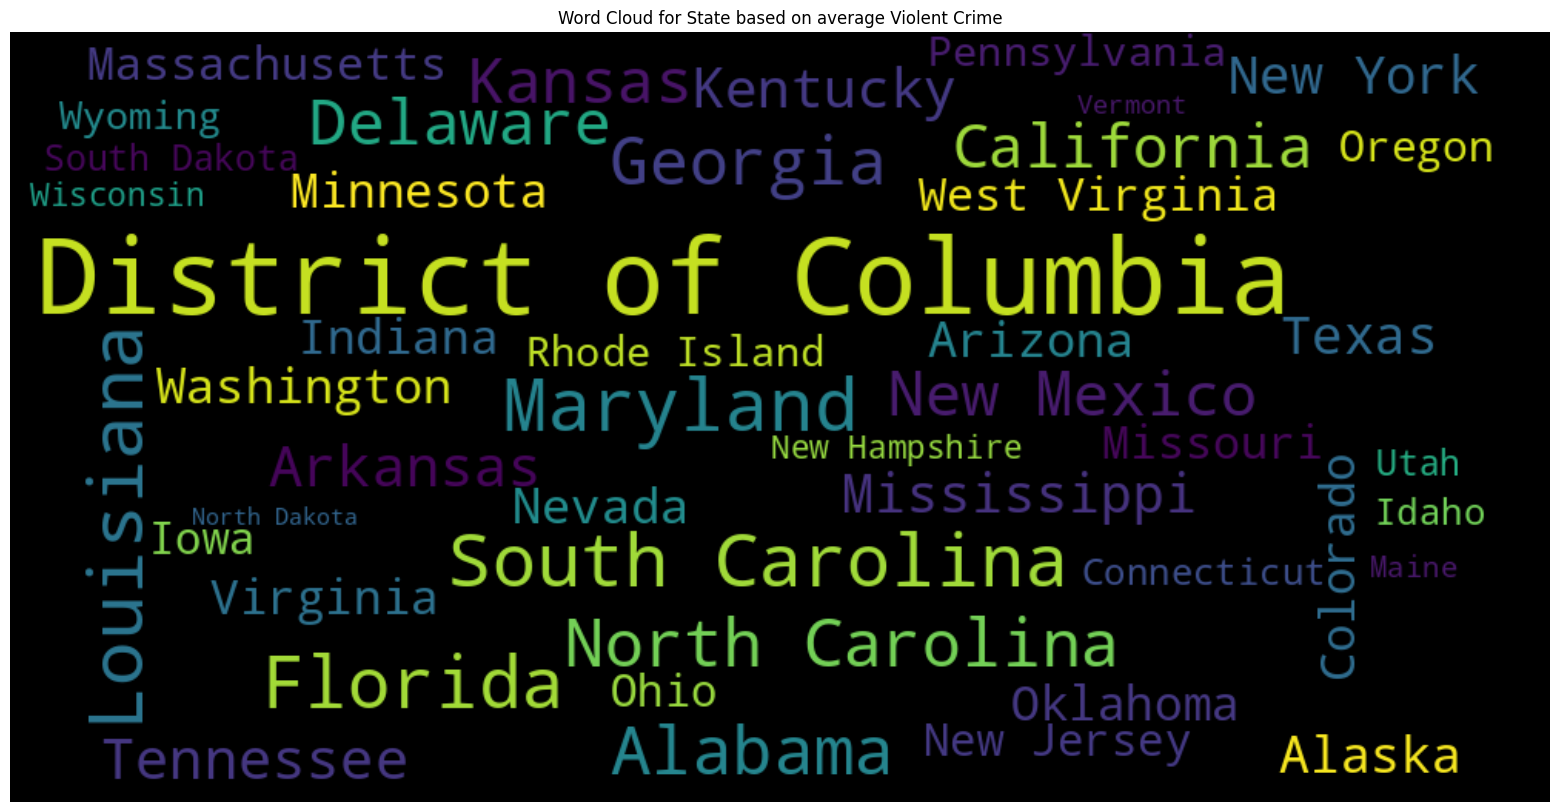

In [26]:
plt.figure(figsize=(20,10))
plt.imshow(wc_violent, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for State based on average Violent Crime")

Text(0.5, 1.0, 'Word Cloud for State based on average Non Violent Crime')

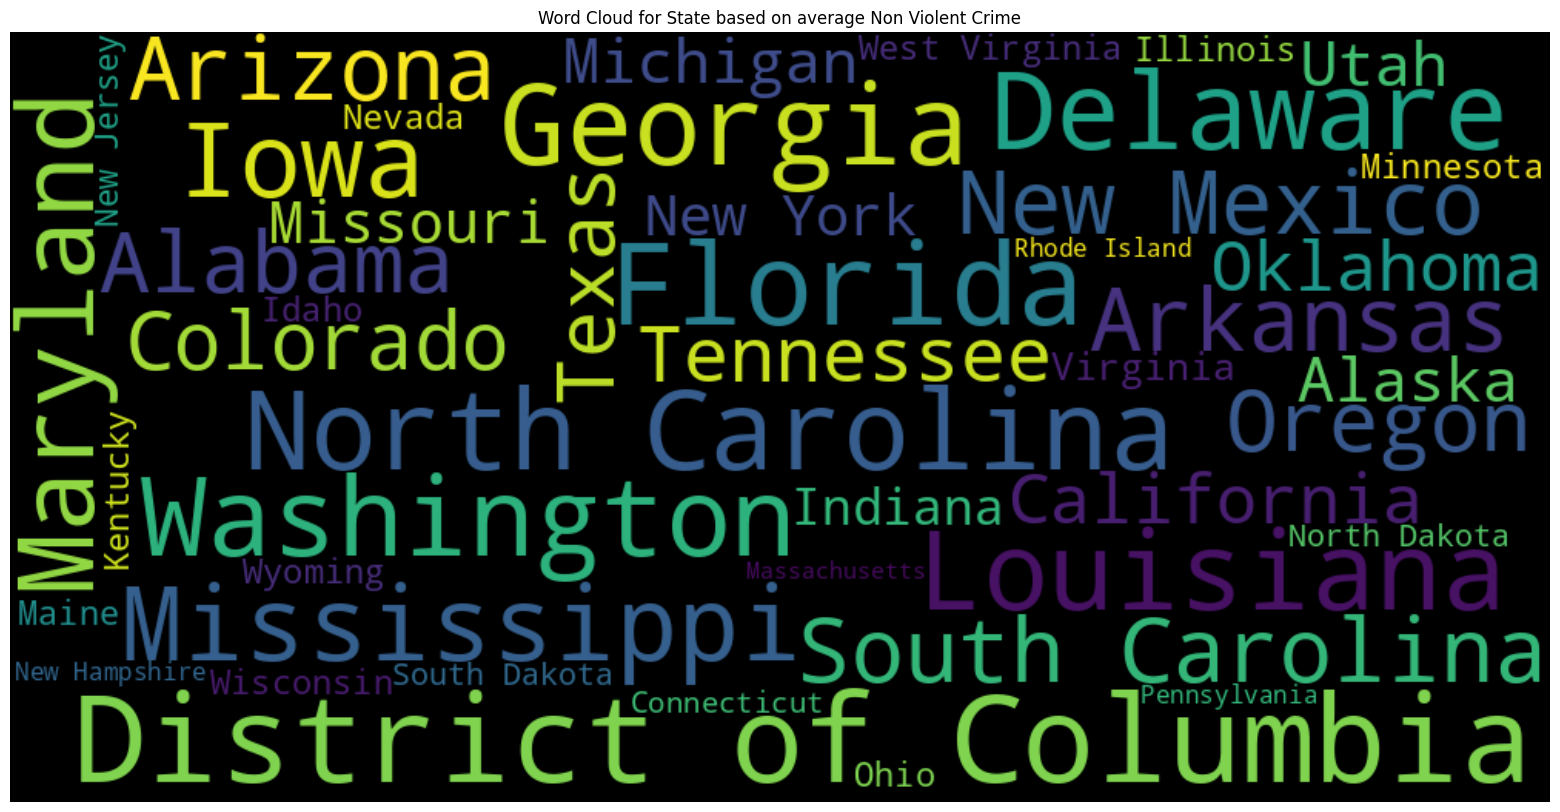

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(wc_nonviolent, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for State based on average Non Violent Crime")

En específico el distrito de Columbia también conocido como Washington DC es el estado con mayor porcentaje de crímenes violentos y no violentos

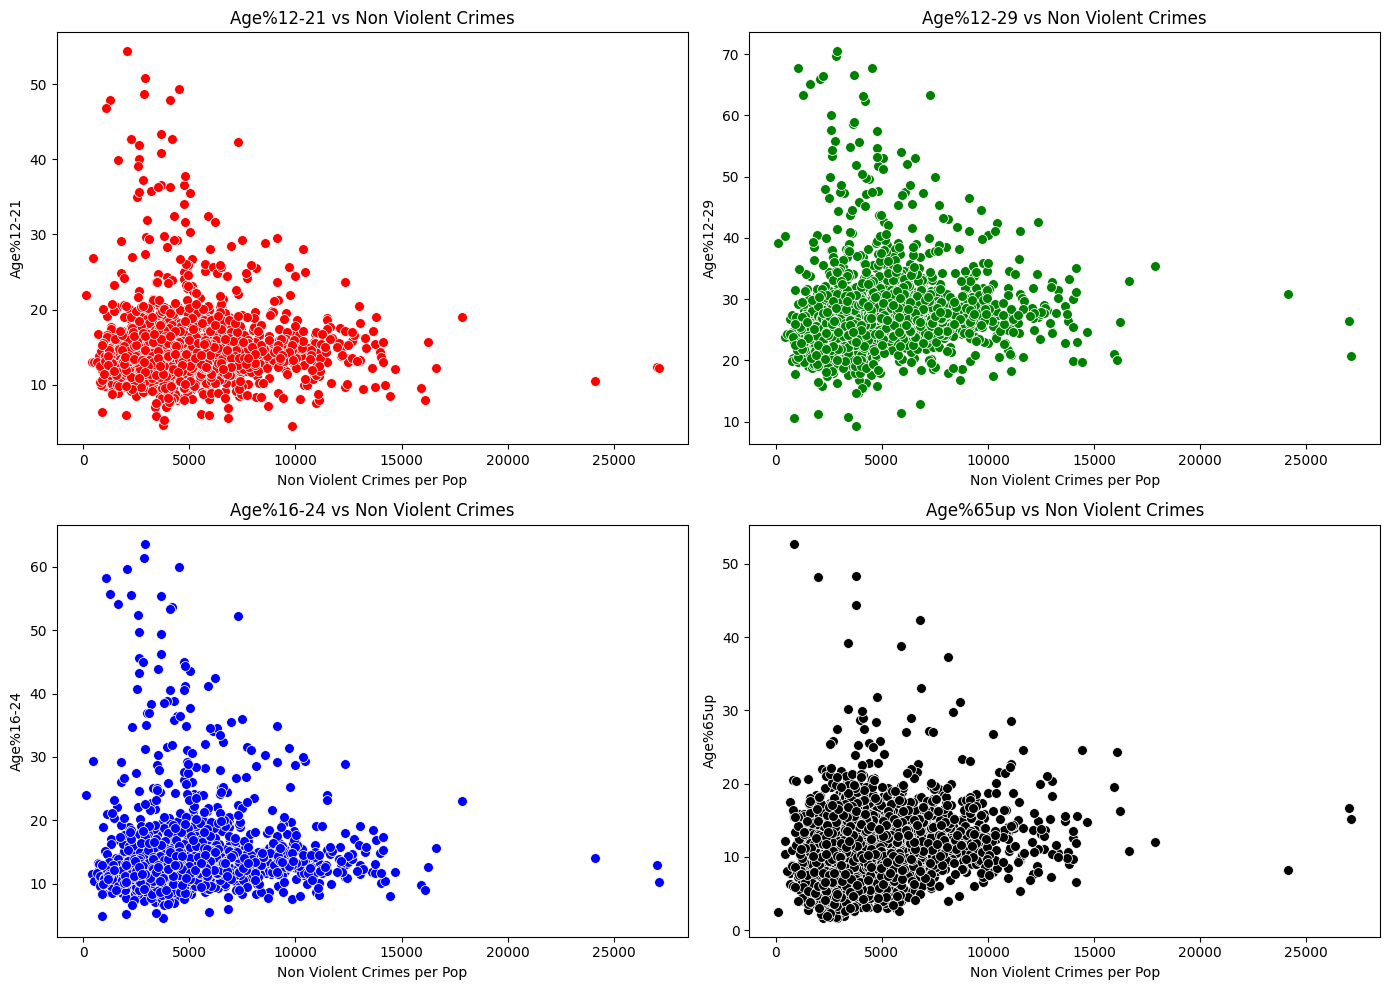

In [41]:
# Configurar los subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico para Age%12-21
sns.scatterplot(x='nonViolPerPop', y='agePct12t21', data=crimedata, color='red', s=50, ax=axes[0, 0])
axes[0, 0].set_title('Age%12-21 vs Non Violent Crimes')
axes[0, 0].set_xlabel('Non Violent Crimes per Pop')
axes[0, 0].set_ylabel('Age%12-21')

# Gráfico para Age%12-29
sns.scatterplot(x='nonViolPerPop', y='agePct12t29', data=crimedata, color='green', s=50, ax=axes[0, 1])
axes[0, 1].set_title('Age%12-29 vs Non Violent Crimes')
axes[0, 1].set_xlabel('Non Violent Crimes per Pop')
axes[0, 1].set_ylabel('Age%12-29')

# Gráfico para Age%16-24
sns.scatterplot(x='nonViolPerPop', y='agePct16t24', data=crimedata, color='blue', s=50, ax=axes[1, 0])
axes[1, 0].set_title('Age%16-24 vs Non Violent Crimes')
axes[1, 0].set_xlabel('Non Violent Crimes per Pop')
axes[1, 0].set_ylabel('Age%16-24')

# Gráfico para Age%65up
sns.scatterplot(x='nonViolPerPop', y='agePct65up', data=crimedata, color='black', s=50, ax=axes[1, 1])
axes[1, 1].set_title('Age%65up vs Non Violent Crimes')
axes[1, 1].set_xlabel('Non Violent Crimes per Pop')
axes[1, 1].set_ylabel('Age%65up')

# Ajustar el diseño
plt.tight_layout()
plt.show()

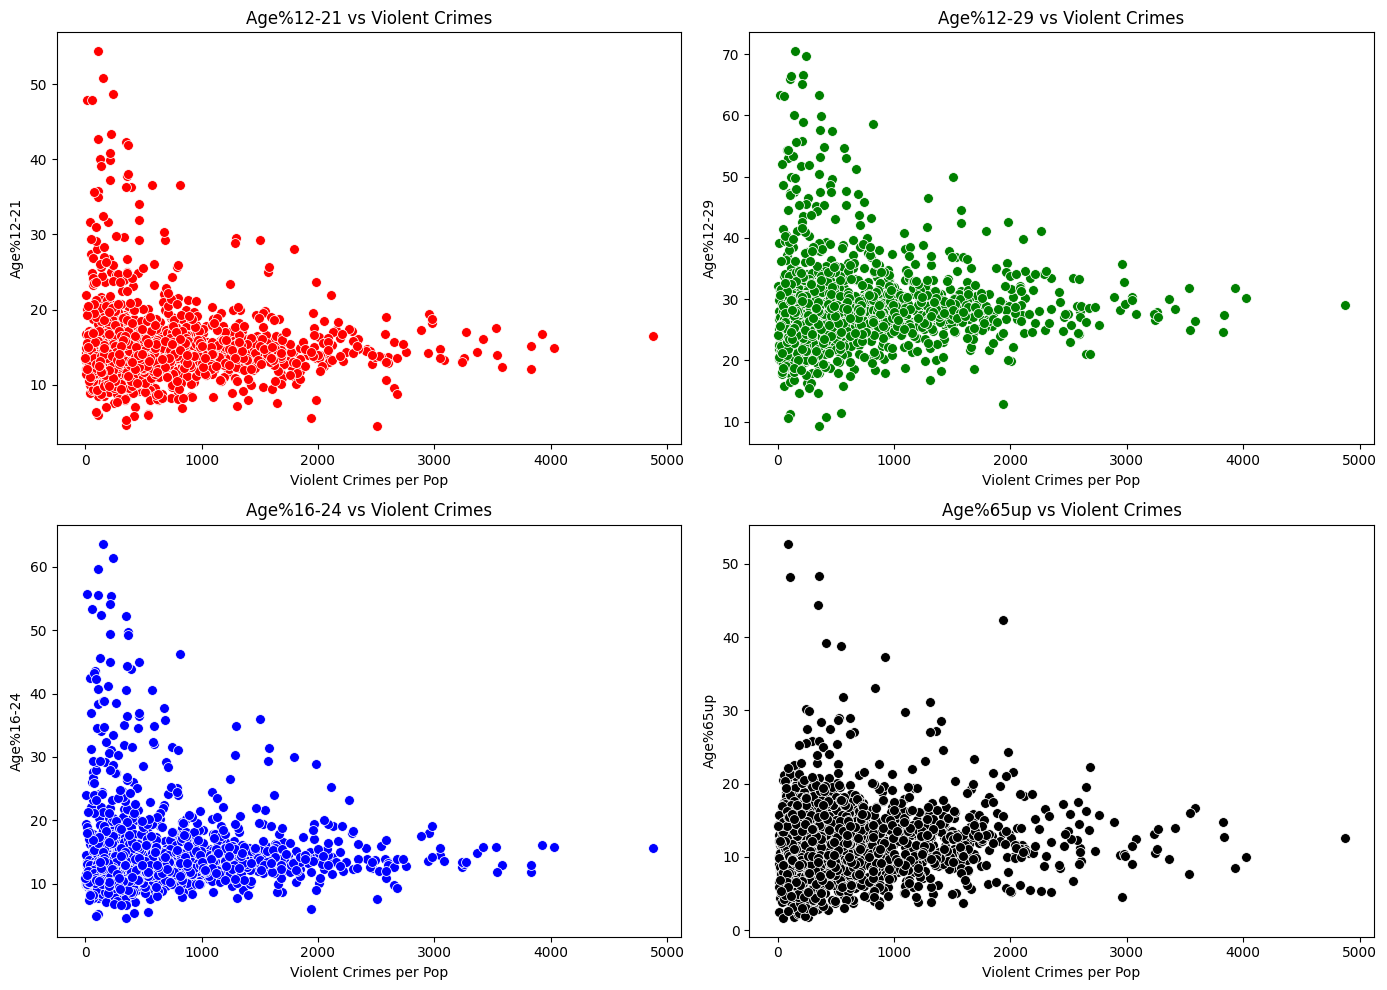

In [42]:
# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico para Age%12-21
sns.scatterplot(x='ViolentCrimesPerPop', y='agePct12t21', data=crimedata, color='red', s=50, ax=axes[0, 0])
axes[0, 0].set_title('Age%12-21 vs Violent Crimes')
axes[0, 0].set_xlabel('Violent Crimes per Pop')
axes[0, 0].set_ylabel('Age%12-21')

# Gráfico para Age%12-29
sns.scatterplot(x='ViolentCrimesPerPop', y='agePct12t29', data=crimedata, color='green', s=50, ax=axes[0, 1])
axes[0, 1].set_title('Age%12-29 vs Violent Crimes')
axes[0, 1].set_xlabel('Violent Crimes per Pop')
axes[0, 1].set_ylabel('Age%12-29')

# Gráfico para Age%16-24
sns.scatterplot(x='ViolentCrimesPerPop', y='agePct16t24', data=crimedata, color='blue', s=50, ax=axes[1, 0])
axes[1, 0].set_title('Age%16-24 vs Violent Crimes')
axes[1, 0].set_xlabel('Violent Crimes per Pop')
axes[1, 0].set_ylabel('Age%16-24')

# Gráfico para Age%65up
sns.scatterplot(x='ViolentCrimesPerPop', y='agePct65up', data=crimedata, color='black', s=50, ax=axes[1, 1])
axes[1, 1].set_title('Age%65up vs Violent Crimes')
axes[1, 1].set_xlabel('Violent Crimes per Pop')
axes[1, 1].set_ylabel('Age%65up')

# Ajustar el diseño
plt.tight_layout()
plt.show()

Visualmente no se identifica un patrón respecto a las categorías de edad y el porcentaje de crímenes

<Axes: xlabel='Region', ylabel='ViolentCrimesPerPop'>

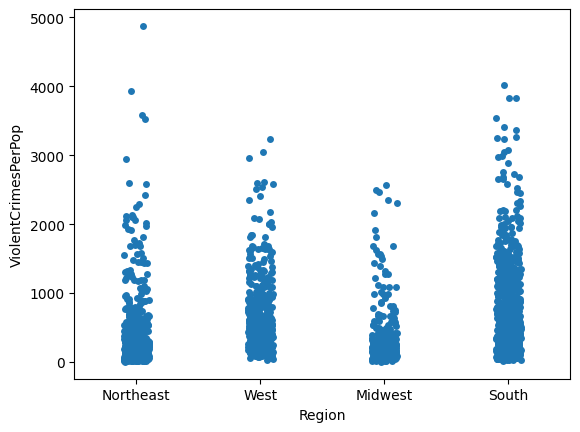

In [30]:
sns.stripplot(x='Region', y='ViolentCrimesPerPop', data=crimedata, jitter=True)

<Axes: xlabel='Region', ylabel='nonViolPerPop'>

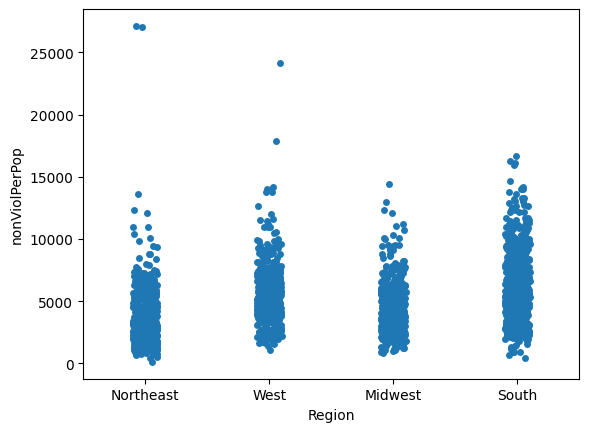

In [31]:
sns.stripplot(x='Region', y='nonViolPerPop', data=crimedata, jitter=True)

Se observa que la región sur de Estados Unidos es la que tiene mayor porcentaje de crimenes violentos

<Axes: xlabel='HispPerCap', ylabel='ViolentCrimesPerPop'>

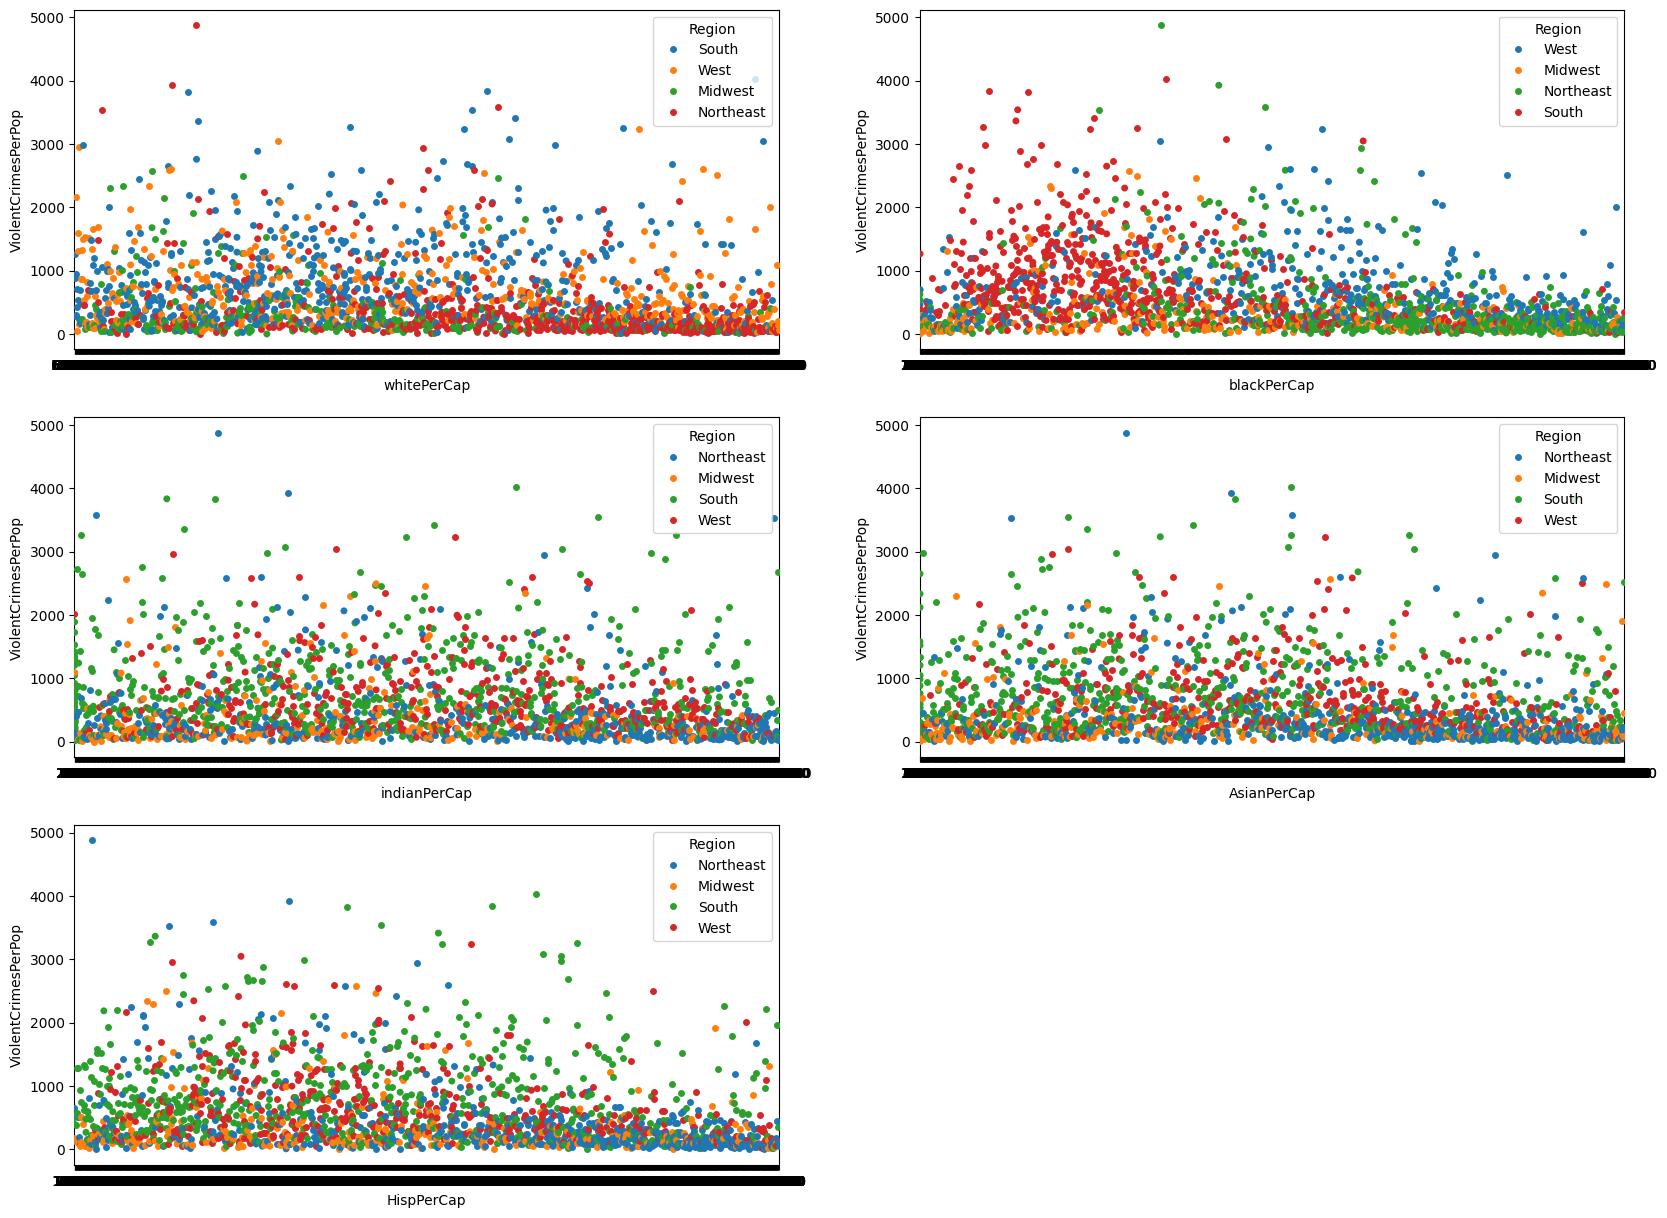

In [32]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.swarmplot(x="whitePerCap", y="ViolentCrimesPerPop", hue="Region", data=crimedata)
plt.subplot(3,2,2)
sns.swarmplot(x="blackPerCap", y="ViolentCrimesPerPop", hue="Region", data=crimedata)
plt.subplot(3,2,3)
sns.swarmplot(x="indianPerCap", y="ViolentCrimesPerPop", hue="Region", data=crimedata)
plt.subplot(3,2,4)
sns.swarmplot(x="AsianPerCap", y="ViolentCrimesPerPop", hue="Region", data=crimedata)
plt.subplot(3,2,5)
sns.swarmplot(x="HispPerCap", y="ViolentCrimesPerPop", hue="Region", data=crimedata)

Se identifica que la tasa de crimenes violentos realizados por personas de todas las razas incrementan en la región sur del país

<Axes: xlabel='HispPerCap', ylabel='nonViolPerPop'>

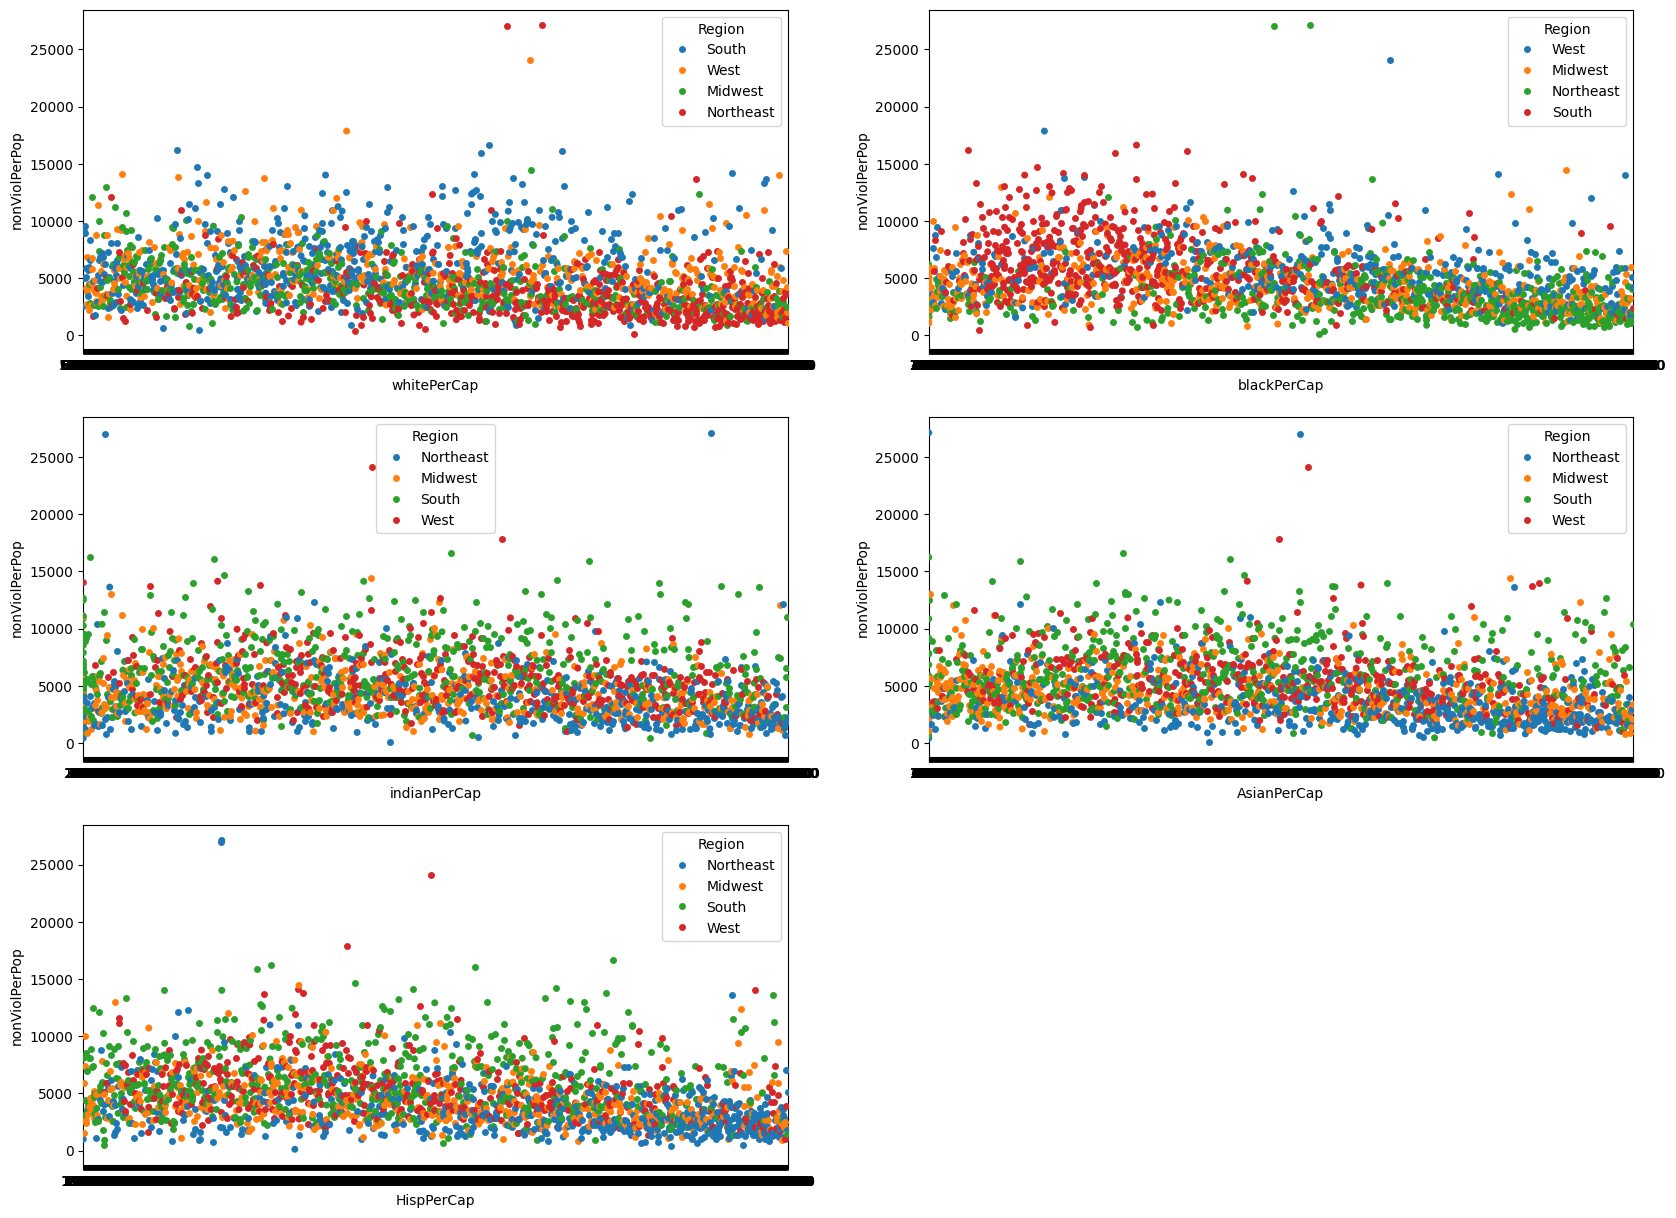

In [33]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
sns.swarmplot(x="whitePerCap", y="nonViolPerPop", hue="Region", data=crimedata)
plt.subplot(3,2,2)
sns.swarmplot(x="blackPerCap", y="nonViolPerPop", hue="Region", data=crimedata)
plt.subplot(3,2,3)
sns.swarmplot(x="indianPerCap", y="nonViolPerPop", hue="Region", data=crimedata)
plt.subplot(3,2,4)
sns.swarmplot(x="AsianPerCap", y="nonViolPerPop", hue="Region", data=crimedata)
plt.subplot(3,2,5)
sns.swarmplot(x="HispPerCap", y="nonViolPerPop", hue="Region", data=crimedata)

Se identifica que la tasa de crimenes no violentos realizados por personas de todas las razas incrementan en la región sur del país

###**Seleccionar la variable a predecir y analizar**

Segun la descipción el dataset tiene 18 variables a predecir.

Los dos de ellos **ViolentCrimesPerPop** y  **nonViolPerPop** se calcularon a partir de la suma de las variables delictivas consideradas como **delitos violentos** en Estados Unidos: **asesinato, violación, robo y asalto** y de las variables delictivas consideradas **delitos no violentos**: **robos, hurtos, robos de vehículos e incendios provocados** respectivamente.

Para objetivos de esta actividad decidimos elegir la variable **nonViolPerPop**  que tiene menos valores faltantes, en concreto 97(4.38% del total). La variable **ViolentCrimesPerPop** tiene 221(10% del total).

Entonces dejamos con una variable dependiente **nonViolPerPop** quitando el resto 17 del dataset.

In [ ]:
df = df.drop(columns=['murders', 'murdPerPop', 'rapes', 'rapesPerPop', 'robberies', 'robbbPerPop', 'assaults', 'assaultPerPop'
, 'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft', 'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop'])
print("El numero de variables: ", df.shape[1])

El numero de variables:  104


Eliminamos las observaciones con valores faltantes de la variable respuesta **nonViolPerPop**.

In [ ]:
df = df[df["nonViolPerPop"].isnull() != True]
print(df.shape)

(2118, 104)


Solo tenemos que ver el valor faltante de la variable **OtherPerCap**.

En la descripción del dataset se dice:

**OtherPerCap**: per capita income for people with 'other' heritage (numeric - decimal).

Vemos que este territorio esta en el estado Mississippi(MS). Hemos dicidido cambiar el valor faltante por la media aritmetica de esta variable en dicho estado.

In [ ]:
df[df["OtherPerCap"].isna()]

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,nonViolPerPop
2005,MS,19460,2.54,50.34,49.31,0.23,0.5,14.5,23.98,11.82,15.67,0,0.0,16769,64.79,1.04,29.73,35.04,15.81,16.21,22258,10387,14988,5876,4872,16278,NaN,17758,6051,31.79,15.56,31.12,18.69,12.38,47.77,14.39,27.69,13.11,31.42,11.68,30.57,14.89,13.49,3.12,53.27,47.08,52.64,54.68,64.71,67.96,1923,10.44,74,9.46,9.46,9.46,9.46,0.04,0.04,0.04,0.04,98.09,0.26,5.45,3.69,2.49,2.48,2.5,62.23,3.71,42.94,3,1000,88.45,62.36,4.0,53.2,1957,8.54,0.95,31200,45700,70000,38800,99,169,274,175,277,28.2,21.0,15.6,0,0,0.38,79.54,61.25,87.63,92.11,13.7,1422.1,0.85,0.0,7365.77


In [ ]:
df[df["state"]=="MS"]["OtherPerCap"].describe()

,OtherPerCap
count,19.000000
mean,7327.315789
std,5406.992603
min,0.000000
25%,4178.000000
50%,7163.000000
75%,10081.000000
max,20040.000000


In [ ]:
df.loc[df["state"]=="MS", "OtherPerCap"] = df[df["state"]=="MS"]["OtherPerCap"].fillna(df[df["state"]=="MS"]["OtherPerCap"].mean())

In [ ]:
df[df["state"]=="MS"]["OtherPerCap"].describe()

,OtherPerCap
count,20.000000
mean,7327.315789
std,5262.780144
min,0.000000
25%,4221.000000
50%,7245.157895
75%,9876.000000
max,20040.000000


Comprobamos que el dataset no tiene valores faltantes.

In [ ]:
valores_nulos = np.sum(df.isna())
valores_nulos = valores_nulos.rename('num_nulos')
valores_nulos = pd.DataFrame(valores_nulos)
valores_nulos = valores_nulos[valores_nulos["num_nulos"] > 0]
valores_nulos

,num_nulos


Tras limpiar el dataset tenemos

In [ ]:
shape = df.shape
print("El numero de observaciones: ", shape[0])
print("El numero de variables: ", shape[1])

El numero de observaciones:  2118
El numero de variables:  104


###**Tratamiento la variable cualitativa nominal - state -**.

El algoritmo Regresion Lineal se supone que las variables independientes son cuantitativas. Asi que tenemos que tratar la variable **state** antes de aplicarlo.

In [ ]:
states = df[["state", "nonViolPerPop"]].groupby("state").mean().sort_values(by="nonViolPerPop", ascending=True)

states = states.reset_index()
states = states.rename(columns={"index":"ID"})
states['ID'] = states.index + 1
states = states[["ID", "state", "nonViolPerPop"]]
states = states.set_index("state")
states.head(10)

,ID,nonViolPerPop
state,,
MA,1,2825.418103
PA,2,3125.366100
RI,3,3172.666538
NH,4,3355.565714
CT,5,3557.605211
SD,6,3798.261250
ND,7,3798.983750
NJ,8,3831.118436
MN,9,4098.118125


In [ ]:
df["state_num"] = df["state"].map(states["ID"])
df[["state", "state_num"]].head()

,state,state_num
0,NJ,8
1,PA,2
2,OR,31
4,MN,9
5,MO,22


###**Modelo 1**. Aplicamos el metodo Ordinary Least Squares OLS al dataset con todas variables.

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

#Separamos la variable dependiente de las independientes
df_X_train = df.drop(columns=['nonViolPerPop','state'])
X_train = df.drop(columns=['nonViolPerPop', 'state']).to_numpy()
y_train = df['nonViolPerPop'].to_numpy()

#Escalamos las variable en un rango de 0 a 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Add constant
X_train_lm = sm.add_constant(X_train)

# Fit OLS model
model = sm.OLS(y_train, X_train_lm).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     29.93
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:19:16   Log-Likelihood:                -18800.
No. Observations:                2118   AIC:                         3.780e+04
Df Residuals:                    2016   BIC:                         3.838e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4908.2418     38.585    127.206      0.0

In [ ]:
print("R-cuadrado:", round(model.rsquared, 2))
print("R-cuadrado ajustado:", round(model.rsquared_adj,2))
print("AIC:", round(model.aic,2))
print("BIC:",round(model.bic, 2))

R-cuadrado: 0.6
R-cuadrado ajustado: 0.58
AIC: 37803.73
BIC: 38380.87


### **Modelo 2.** Hacemos la reducción de características basándose en la matriz de correlación.

Miramos la matriz de corelación aplicando el umbral para los coeficientes de correlación.

(103, 103)


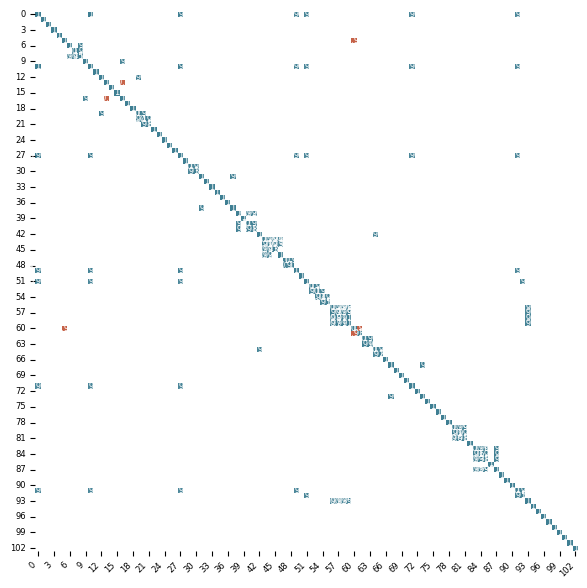

In [ ]:
corr_matrix = pd.DataFrame(X_train).corr()

umbral = 0.9
filtered_corr_matrix = corr_matrix[(corr_matrix >= umbral) | (corr_matrix <= -umbral)]
# Heatmap matriz de correlaciones

print(filtered_corr_matrix.shape)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

sns.heatmap(
    filtered_corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = False,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 6)
plt.show()

Podriamos eliminar las variables que estan altamente correlacionadas. Es decir, tienen los coeficientes de correlación más del umbral. Asi que eliminamos la colinealidad en los conjuntos de datos.

In [ ]:
upper_tri = np.triu(np.abs(corr_matrix), k=1)
columnas = upper_tri.max(axis=0) < umbral
print("El numero total de variables:", len(columnas))
print("El numero de variables a tomar: ", len(columnas[columnas==True]))
columnas

El numero total de variables: 103
El numero de variables a tomar:  65


array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Creamos el dataset con columnas que tienen el valor True.

In [ ]:
X_train_matcor = X_train[:, columnas]
X_train_matcor.shape

# Add constant
X_train_matcor_lm = sm.add_constant(X_train_matcor)

# Fit OLS model
model_matcor = sm.OLS(y_train, X_train_matcor_lm).fit()

# Print summary
print(model_matcor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     42.37
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:56:58   Log-Likelihood:                -18869.
No. Observations:                2118   AIC:                         3.787e+04
Df Residuals:                    2052   BIC:                         3.824e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4908.2418     39.509    124.231      0.0

In [ ]:
print("Modelo basado en la matriz de correlación")
print("R-cuadrado:", round(model_matcor.rsquared, 2))
print("R-cuadrado ajustado:", round(model_matcor.rsquared_adj,2))
print("AIC:", round(model_matcor.aic,2))
print("BIC:",round(model_matcor.bic, 2))

print("\nModelo con todas las variables")
print("R-cuadrado:", round(model.rsquared, 2))
print("R-cuadrado ajustado:", round(model.rsquared_adj,2))
print("AIC:", round(model.aic,2))
print("BIC:",round(model.bic, 2))

Modelo basado en la matriz de correlación
R-cuadrado: 0.57
R-cuadrado ajustado: 0.56
AIC: 37869.46
BIC: 38242.9

Modelo con todas las variables
R-cuadrado: 0.6
R-cuadrado ajustado: 0.58
AIC: 37803.73
BIC: 38380.87


Podriamos concluir que la reducción de la variables basándose en la matriz de correlación no ha mejorado el modelo.

### **Modelo 3.** Hacemos la reducción de características basándose en p-values de las variables del dataset.

Seleccionamos variables basadas en sus valores p.

In [ ]:
columnas_pvalue = pd.DataFrame(model.pvalues[1:]).sort_values(by=0, ascending=True)
columnas_pvalue = columnas_pvalue[columnas_pvalue.values < 0.05].index
print("El numero total de variables:", len(columnas))
print("El numero de variables a tomar: ", len(columnas_pvalue))
columnas_pvalue

El numero total de variables: 103
El numero de variables a tomar:  32


Index([102,  99,  39,  66,  33,  16,  67,  73,  18,  75,  72,  93,  31, 101,
         6,   8,  53,  49,  11,  10,  37,  21,  29,  28,   0,  89,  34,  56,
        98,  83,  27,  50],
      dtype='int64')

In [ ]:
X_train_pvalues = X_train[:, columnas_pvalue]
print(X_train_pvalues.shape)

# Add constant
X_train_pvalues_lm = sm.add_constant(X_train_pvalues)

# Fit OLS model
model_pvalues = sm.OLS(y_train, X_train_pvalues_lm).fit()

# Print summary
print(model_pvalues.summary())

(2118, 32)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     85.81
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:57:18   Log-Likelihood:                -18880.
No. Observations:                2118   AIC:                         3.783e+04
Df Residuals:                    2085   BIC:                         3.801e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4908.2418     39.409    124.5

In [ ]:
print("\nModelo con las variables basados en valores p")
print("R-cuadrado:", round(model_pvalues.rsquared, 2))
print("R-cuadrado ajustado:", round(model_pvalues.rsquared_adj,2))
print("AIC:", round(model_pvalues.aic,2))
print("BIC:",round(model_pvalues.bic, 2))


Modelo con las variables basados en valores p
R-cuadrado: 0.57
R-cuadrado ajustado: 0.56
AIC: 37826.51
BIC: 38013.23


Se ve que el modelo no ha mejorado tampoco si comparar con el modelo de todas las variables.

### **Modelo 4.** Hacemos la reducción de características basándose en p-values de las variables del dataset.